# Text Preprocessing Methods

Throughout this notebook we will be using a [Romeo and Juliet ebook](./RomeoAndJuliet.txt)

The line `!pip install nltk` is used to install the **Natural Language Toolkit (NLTK)**, a popular Python library for natural language processing (NLP).

* The `!` at the beginning is specific to environments like Jupyter Notebooks, where it allows shell commands to be run directly from a code cell.
* `pip install nltk` tells Python’s package manager (`pip`) to download and install the NLTK library and its dependencies.

Once installed, you can use NLTK for tasks like tokenization, stemming, sentiment analysis, and working with corpora or linguistic datasets.

In [130]:
%pip install nltk
%pip install matplotlib

  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached click-8.2.1-py3-none-any.whl.metadata (2.5 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached regex-2024.11.6-cp311-cp311-macosx_11_0_arm64.whl.metadata (40 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached regex-2024.11.6-cp311-cp311-macosx_11_0_arm64.whl (284 kB)
Using cached click-8.2.1-py3-none-any.whl (102 kB)
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [nltk]4/5 [nltk]b]
Note: you may need to restart the kernel to use updated packages.
  Using cached matplotlib-3.10.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp311-cp311-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.2-

This code block sets up the tools needed for basic text processing and analysis. It imports the NLTK library for natural language processing, Python's built-in `string` module for handling punctuation, and `matplotlib.pyplot` for creating visualizations. It also downloads two essential NLTK resources: `punkt_tab` for advanced word tokenization and `stopwords` for filtering out common words that usually don't carry meaningful information. Finally, it imports `word_tokenize` to split text into individual words and `FreqDist` to calculate the frequency of those words for further analysis or visualization.

In [131]:
import nltk
import string
import matplotlib.pyplot as plt

nltk.download("punkt_tab")
nltk.download("stopwords")

from nltk import word_tokenize
from nltk.probability import FreqDist

       

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/mearacox/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mearacox/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Defining a `read_book` function

This code defines a function `read_book(title)` that reads the full contents of a text file and returns it as a single cleaned-up string.

Inside the function, the `with open(...)` statement opens the file specified by `title` in read mode with UTF-8 encoding, ensuring it can handle most characters properly. The `read()` method loads the entire file content from the start of the play, using the `start_marker` variable, to the end of the play, using the `end_marker` variable, into the variable `text`.  Line breaks (`\n` and `\r`) are replaced with spaces to flatten the structure. It also uses a regular expression to replace any sequence of multiple whitespace characters with a single space, ensuring consistent spacing. Then, it trims any leading or trailing whitespace and returns the cleaned text, making it ready for further processing like tokenization or analysis.

After defining the function, the line `text = read_book("RomeoAndJuliet.txt")` calls it to load the contents of *Romeo and Juliet*. The following line, `text = text.lower()`, converts the entire text to lowercase. Finally, `print(text)` displays the cleaned, lowercase version of the text.


In [132]:
def read_book(title):
    with open(title, "r", encoding="utf8") as current_file:
        text = current_file.read()
        
    # Find the start position
    start_marker = "1595"
    start_pos = text.find(start_marker)
    
        
    if start_pos == -1:
        print("Start marker not found")
        return ""
        
    # Find the end position
    end_marker = "THE END"
    end_pos = text.find(end_marker, start_pos)
    
    if end_pos == -1:
        print("End marker not found")
        return ""
        
    # Extract the text between markers (including "The end")
    text = text[start_pos:end_pos + len(end_marker)]
    
    # Clean up the text as before
    text = text.replace("\n", " ").replace("\r", " ")
    # Remove multiple consecutive spaces
    import re
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

In [133]:
# using raw_text to keep the original text intact
raw_text = read_book("RomeoAndJuliet.txt")

In [134]:
print(raw_text)

1595 THE TRAGEDY OF ROMEO AND JULIET by William Shakespeare Dramatis Personae Chorus. Escalus, Prince of Verona. Paris, a young Count, kinsman to the Prince. Montague, heads of two houses at variance with each other. Capulet, heads of two houses at variance with each other. An old Man, of the Capulet family. Romeo, son to Montague. Tybalt, nephew to Lady Capulet. Mercutio, kinsman to the Prince and friend to Romeo. Benvolio, nephew to Montague, and friend to Romeo Tybalt, nephew to Lady Capulet. Friar Laurence, Franciscan. Friar John, Franciscan. Balthasar, servant to Romeo. Abram, servant to Montague. Sampson, servant to Capulet. Gregory, servant to Capulet. Peter, servant to Juliet's nurse. An Apothecary. Three Musicians. An Officer. Lady Montague, wife to Montague. Lady Capulet, wife to Capulet. Juliet, daughter to Capulet. Nurse to Juliet. Citizens of Verona; Gentlemen and Gentlewomen of both houses; Maskers, Torchbearers, Pages, Guards, Watchmen, Servants, and Attendants. SCENE.--

## Using `.replace()` to remove punctuation
This code removes all punctuation marks from the text by replacing them with spaces.

It loops through each character in `string.punctuation`, which contains common punctuation symbols (like `.`, `!`, `?`, `,`, etc.). For every punctuation mark found, `text.replace(x, " ")` replaces it, `x`,  with a space, helping to separate words cleanly without merging them accidentally. After the loop finishes, the text is free of punctuation. The `print()` statements then display a message and the cleaned version of the text, making it ready for further processing like tokenization or frequency analysis.


In [135]:
# traverse the given string and if any punctuation marks occur replace it with null 
text = raw_text
for x in string.punctuation: 
  text = text.replace(x, "") 
# Print string without punctuation 
print("\n AFTER REMOVING PUNCTUATIONS:\n")
print(text)




 AFTER REMOVING PUNCTUATIONS:

1595 THE TRAGEDY OF ROMEO AND JULIET by William Shakespeare Dramatis Personae Chorus Escalus Prince of Verona Paris a young Count kinsman to the Prince Montague heads of two houses at variance with each other Capulet heads of two houses at variance with each other An old Man of the Capulet family Romeo son to Montague Tybalt nephew to Lady Capulet Mercutio kinsman to the Prince and friend to Romeo Benvolio nephew to Montague and friend to Romeo Tybalt nephew to Lady Capulet Friar Laurence Franciscan Friar John Franciscan Balthasar servant to Romeo Abram servant to Montague Sampson servant to Capulet Gregory servant to Capulet Peter servant to Juliets nurse An Apothecary Three Musicians An Officer Lady Montague wife to Montague Lady Capulet wife to Capulet Juliet daughter to Capulet Nurse to Juliet Citizens of Verona Gentlemen and Gentlewomen of both houses Maskers Torchbearers Pages Guards Watchmen Servants and Attendants SCENEVerona Mantua THE PROLOGUE 

## Using `.lower()` to make text uniform
This code is using `.lower()` to convert all characters in the text to lowercase, which is a common step in text preprocessing to ensure consistency (so that words like "This" and "this" are treated the same). Similarly, the `.upper()` method converts all characters to uppercase. Finally, `print(text)` outputs the lowercase version of the text.


In [136]:
#sample text
sample_text = "This is my test text. We're keeping this text short to keep things manageable."
sample_text = sample_text.lower() 
print(sample_text)

this is my test text. we're keeping this text short to keep things manageable.


In [137]:
text = text.lower()
print(text)

1595 the tragedy of romeo and juliet by william shakespeare dramatis personae chorus escalus prince of verona paris a young count kinsman to the prince montague heads of two houses at variance with each other capulet heads of two houses at variance with each other an old man of the capulet family romeo son to montague tybalt nephew to lady capulet mercutio kinsman to the prince and friend to romeo benvolio nephew to montague and friend to romeo tybalt nephew to lady capulet friar laurence franciscan friar john franciscan balthasar servant to romeo abram servant to montague sampson servant to capulet gregory servant to capulet peter servant to juliets nurse an apothecary three musicians an officer lady montague wife to montague lady capulet wife to capulet juliet daughter to capulet nurse to juliet citizens of verona gentlemen and gentlewomen of both houses maskers torchbearers pages guards watchmen servants and attendants sceneverona mantua the prologue enter chorus chor two households

## Using `len()`
We can use `print(len(text))` to print the **number of characters** in the string `text `, including letters, spaces, and any remaining symbols.
For example, if `text = "hello world"`, `len(text)` returns `11` (5 letters + 1 space + 5 letters).
This is useful for checking the length of the entire string, but it doesn’t tell you how many words there are.

We can also use `print(len(text.split()))` to print the **number of words** in the string `text`. `text.split()` breaks the string into a list of words using whitespace (spaces, tabs, line breaks) as the default separator.
For example, if `text = "hello world"`, then `text.split()` returns `["hello", "world"]`, and `len(text.split())` returns `2`.
This is commonly used in text analysis to count how many words are in a document or sentence.

In [138]:

# Count the number of characters after removing punctuations
print(len(text))

# Count the number of words after removing punctuations
print(len(text.split()))

129616
25789


## Tokenizing
This line of code breaks the input text into individual tokens, which are typically words and punctuation marks. First, the text is converted to lowercase using `text.lower()` to ensure consistency in analysis. Then, the `word_tokenize()` function from NLTK is used to intelligently split the text into a list of tokens, accounting for punctuation, contractions, and special characters. The resulting tokens are stored in the variable `token`, making them ready for further processing such as frequency analysis or filtering.

In [139]:
# BREAK THE STRING INTO TOKENS
token = word_tokenize(text.lower())

## Using `stopwords` to remove stop words
This code removes common stopwords from the list of tokens in the text. It first imports the list of English stopwords from the NLTK corpus and stores them as a set `a` for faster lookup. Then, it uses a list comprehension to create a new list `no_stopwords` containing only the tokens that are **not** in the stopwords set. Finally, it prints the cleaned list of tokens, which now excludes common words like "the", "is", and "and"—helping to focus analysis on more meaningful content.

For more on using stopwords check out [Creating a Stopwords List](../creating-stopwords-list.ipynb)

In [140]:
from nltk.corpus import stopwords
# Get all the speaker names from your text to remove who is speaking from analysis
speaker_names = {"ben", "rom", "ty", "prince", "cap", "wife", "mon", "par", 
                "serv", "nurse", "jul", "mer", "officer", "citizens", "greg", "samp",
                "abr", "m wife", "chor", "mer"}

# Combine with other stopwords specific to the text
custom_words = {"thou", "thy", "thee", "tis", "twas", "hath", "doth", "ye", "o", 
                "art", "hast", "shalt", "shall", "unto", "wherefore", "ere", "hence", "sir",
                "madam", "enter", "exit", "exeunt", "scene"}

stopwords_set = set(stopwords.words("english"))
stopwords_set.update(custom_words)
stopwords_set.update(speaker_names)


no_stopwords = [x for x in token if x not in stopwords_set] # for each x in text1, if x is not in a then, add it to the list" 
print("After removing the stop words:\n", no_stopwords)


After removing the stop words:
 ['1595', 'tragedy', 'romeo', 'juliet', 'william', 'shakespeare', 'dramatis', 'personae', 'chorus', 'escalus', 'verona', 'paris', 'young', 'count', 'kinsman', 'montague', 'heads', 'two', 'houses', 'variance', 'capulet', 'heads', 'two', 'houses', 'variance', 'old', 'man', 'capulet', 'family', 'romeo', 'son', 'montague', 'tybalt', 'nephew', 'lady', 'capulet', 'mercutio', 'kinsman', 'friend', 'romeo', 'benvolio', 'nephew', 'montague', 'friend', 'romeo', 'tybalt', 'nephew', 'lady', 'capulet', 'friar', 'laurence', 'franciscan', 'friar', 'john', 'franciscan', 'balthasar', 'servant', 'romeo', 'abram', 'servant', 'montague', 'sampson', 'servant', 'capulet', 'gregory', 'servant', 'capulet', 'peter', 'servant', 'juliets', 'apothecary', 'three', 'musicians', 'lady', 'montague', 'montague', 'lady', 'capulet', 'capulet', 'juliet', 'daughter', 'capulet', 'juliet', 'verona', 'gentlemen', 'gentlewomen', 'houses', 'maskers', 'torchbearers', 'pages', 'guards', 'watchmen', 

The line `len(no_stopwords)` returns the **number of tokens remaining after stopwords have been removed** from the original text.

This is useful for understanding how much of the text consists of meaningful or content-rich words (i.e., words that aren't basic connectors like *"and"*, *"the"*, or *"is"*). The result gives you a clearer sense of the size of your cleaned, analysis-ready dataset.

In [141]:
len(no_stopwords)

12172

## Using `FreqDist` to Get Frequencies
This code calculates and displays the frequency of the most common words in the cleaned text. First, it creates a `FreqDist` object from the `no_stopwords` list, which counts how often each token appears. Then, `fdist.most_common(5)` returns the top 5 most frequent words along with their counts, and this result is stored in `fdist1`. After printing the top words, the code separates this list of word-frequency pairs into two separate lists: `x` holds the words and `y` holds their corresponding frequencies. This separation is useful for plotting or further analysis.


In [142]:
# find the frequency of tokens
fdist = FreqDist(no_stopwords) 

# Find the top 5 words by frequency
print("TOP 5 WORDS")
fdist1 = fdist.most_common(5)
print(fdist1)

# segregate the above list in 2 lists, words and its frequency
x,y = [[ i for i, j in fdist1 ], 
       [ j for i, j in fdist1 ]]
print(x)
print(y)

TOP 5 WORDS
[('romeo', 137), ('love', 137), ('come', 98), ('friar', 92), ('ill', 84)]
['romeo', 'love', 'come', 'friar', 'ill']
[137, 137, 98, 92, 84]


The line `plt.bar(x, y)` creates a **bar chart** using the two lists:

* `x` contains the **words** (labels for the x-axis), and
* `y` contains the **frequencies** (heights of the bars on the y-axis).

This visualizes the top 5 most common words (after removing stopwords) and shows how frequently each one appears in the text. It's a helpful way to quickly identify which meaningful words are most prominent.


<BarContainer object of 5 artists>

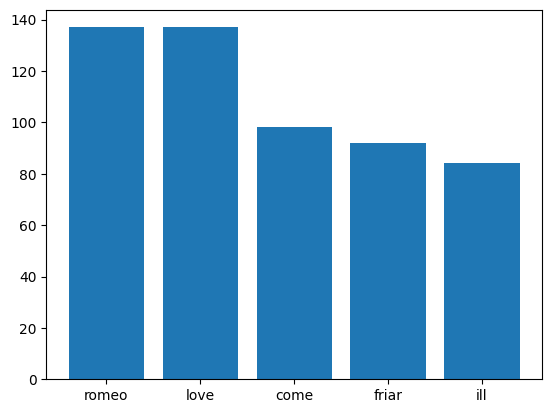

In [143]:
plt.bar(x,y)
 

This code calculates the frequency of all tokens in the text, including common stopwords and punctuation.

First, it uses `FreqDist(token)` to create a frequency distribution object that counts how many times each token appears. Then, `fdist.most_common(5)` retrieves the top 5 most frequent tokens along with their counts, and prints them. Next, it separates this list of (word, frequency) pairs into two separate lists: `x` contains the top 10 words, and `y` contains their corresponding frequencies. These lists can then be used to plot a bar graph or perform other forms of analysis.

In [144]:
# find the frequency of tokens
fdist = FreqDist(token) 

# Find the top 10 words by frequency
print("TOP 5 WORDS")
fdist1 = fdist.most_common(5)
print(fdist1)

# segregate the above list in 2 lists, words and its frequency
x,y = [[ i for i, j in fdist1 ], 
       [ j for i, j in fdist1 ]]
print(x)
print(y)

TOP 5 WORDS
[('and', 713), ('the', 680), ('i', 585), ('to', 541), ('a', 468)]
['and', 'the', 'i', 'to', 'a']
[713, 680, 585, 541, 468]


We can use `plt.bar(x, y)` to draw the bars, where `x` contains the words and `y` their corresponding frequencies. Then, the plot is labeled with `xlabel`, `ylabel`, and `title` to give it context. Instead of just displaying the graph on the screen, `plt.savefig("plot.png")` saves the figure as an image file named **plot.png** in the current directory. This is useful if you want to include the graph in a report or presentation.


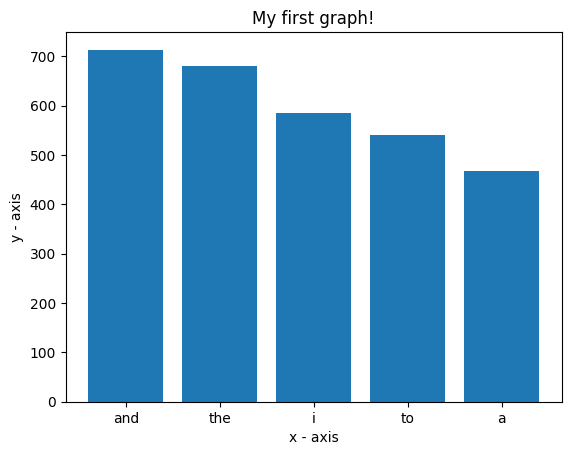

In [145]:
# plotting the points  
plt.bar(x, y) 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('My first graph!') 
  
# function to show the plot 
plt.savefig("plot.png")

The command `! pip install wordcloud` is used in environments like Jupyter Notebook to install the **`wordcloud`** library.

This library allows you to generate **word clouds**, which are visual representations of text data where more frequent words appear larger and bolder. The exclamation mark `!` at the beginning tells the notebook to run the command as a shell command, just like you would in a terminal. After installation, you can use the library to easily create word clouds from token lists, frequency distributions, or raw text.

In [146]:
! pip install wordcloud

  Using cached wordcloud-1.9.4-cp311-cp311-macosx_11_0_arm64.whl.metadata (3.4 kB)
Using cached wordcloud-1.9.4-cp311-cp311-macosx_11_0_arm64.whl (167 kB)


This code generates and displays a **word cloud** from the list of meaningful tokens stored in `no_stopwords`.

It starts by importing `WordCloud` and other useful tools from the `wordcloud` library. A figure is created using `plt.figure()` with a size of 12x12 inches. The word cloud is then generated with specified dimensions (`width=1800`, `height=1400`) by converting the list of tokens (`no_stopwords`) into a single string using `str(no_stopwords)`. The `plt.imshow()` function displays the word cloud image, and `plt.axis("off")` removes the axis for a cleaner look. Finally, `plt.show()` renders the visual, where the size of each word reflects its frequency in the text.


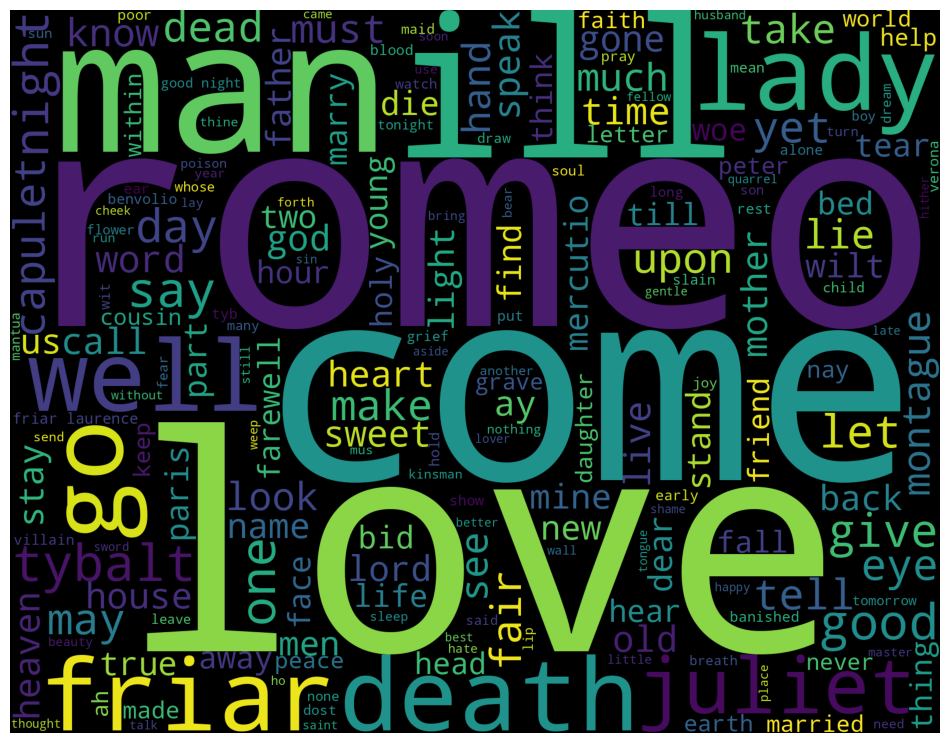

In [147]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

width = 12
height = 12
plt.figure(figsize=(width, height))
if isinstance(no_stopwords, list):
    text_for_wordcloud = ' '.join(no_stopwords)
else:
    text_for_wordcloud = str(no_stopwords)
wordcloud = WordCloud(width=1800,height=1400).generate(str(text_for_wordcloud))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [148]:
# Using Named Entity Recognition (NER) to find names and and locations in the text

## Using NER concepts

These two commands install and set up the **spaCy** natural language processing library along with its small English language model:

1. `!pip3 install spacy` installs the **spaCy** library, which provides fast and accurate tools for tasks like tokenization, part-of-speech tagging, named entity recognition (NER), and more.

2. `!python3 -m spacy download en_core_web_sm` downloads the **small English model** (`en_core_web_sm`) that spaCy uses to analyze and process English text.

In [149]:
# Install the required library spacy
%pip install spacy

# download the small English NLP model from spacy
!python3 -m spacy download en_core_web_sm 

  Using cached spacy-3.8.7-cp311-cp311-macosx_11_0_arm64.whl.metadata (27 kB)
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached murmurhash-1.0.13-cp311-cp311-macosx_11_0_arm64.whl.metadata (2.2 kB)
  Using cached cymem-2.0.11-cp311-cp311-macosx_11_0_arm64.whl.metadata (8.5 kB)
  Using cached preshed-3.0.10-cp311-cp311-macosx_11_0_arm64.whl.metadata (2.4 kB)
  Using cached thinc-8.3.6-cp311-cp311-macosx_11_0_arm64.whl.metadata (15 kB)
  Using cached wasabi-1.1.3-py3-none-any.whl.metadata (28 kB)
  Using cached srsly-2.5.1-cp311-cp311-macosx_11_0_arm64.whl.metadata (19 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl.metadata (14 kB)
  Using cached weasel-0.4.1-py3-none-any.whl.metadata (4.6 kB)
  Using cached typer-0.16.0-py3-none-any.whl.metadata (15 kB)
  Using cached requests-2.32.4-py3-none-any.whl.metadata (4.9 kB)
  Using cached pydantic-2.11.5-py3-none-any.whl.metadata 

The line `import spacy` loads the spaCy library into your Python environment so you can use its natural language processing tools.

In [150]:
# import spacy
import spacy

from spacy.pipeline import EntityRuler
from spacy.language import Language

**This is still a work in progress**  
This code customizes the SpaCy Named Entity Recognition (NER) pipeline specifically for analyzing Shakespeare’s Romeo and Juliet text. It starts by loading the standard English model (en_core_web_sm) and then adds an EntityRuler before the default NER, which lets you define exact match patterns for named entities.

In [151]:
# Load model
nlp = spacy.load("en_core_web_sm")

# Create EntityRuler via pipeline
ruler = nlp.add_pipe("entity_ruler", before="ner")

A list of key character names is created, each assigned the label "PERSON". It also adds geographic locations like `verona` and `mantua` labeled as `GPE` (Geopolitical Entities). To reduce noise and false positives, a list of common short or misleading terms that might be misclassified as persons is added with the label `IGNORE`.

In [152]:
# Define character names from the play
character_names = [
    "escalus", "paris", "montague", "capulet", "romeo", "tybalt",
    "mercutio", "benvolio", "friar laurence", "friar john", "balthasar",
    "abram", "sampson", "gregory", "peter", "lady montague", "lady capulet",
    "juliet", "nurse", "apothecary", "officer", "three musicians"
]

patterns = [{"label": "PERSON", "pattern": name} for name in character_names]

# Add patterns for locations and places
patterns.append({"label": "GPE", "pattern": "verona"})
patterns.append({"label": "GPE", "pattern": "mantua"})


# Terms to ignore/misclassified as PERSON
ignore_terms = ["ben", "rom", "ty", "prince", "cap", "wife", "mon", "par", 
                "serv", "nurse", "jul", "mer", "officer", "citizens", "greg", "samp", 
                "abr", "m wife", "chor", "mer",
                "thou", "thy", "thee", "tis", "twas", "hath", "doth", "ye", "o", 
                "art", "hast", "shalt", "unto", "wherefore", "ere", "hence", "sir",
                "madam", "enter", "exit", "exeunt", "scene"

]

# Add IGNORE patterns
for term in ignore_terms:
    patterns.append({"label": "IGNORE", "pattern": term})

ruler.add_patterns(patterns)

The custom pipeline component `clean_ents` is registered to filter the recognized entities, keeping only `PERSON`, `GPE`, and `LOC` labels, while discarding unwanted or ambiguous ones, especially those in the ignore_terms list or too short and lowercase (likely not valid names). Then, this cleanup component is added to the pipeline.

In [153]:
# 🔧 Register custom cleanup pipe
@Language.component("clean_ents")
def clean_ents(doc):
    allowed_labels = {"PERSON", "GPE", "LOC"}  # Only keep these
    filtered_ents = []
    for ent in doc.ents:
        if ent.label_ not in allowed_labels:
            continue
        if ent.label_ == "PERSON":
            if ent.text.lower() in ignore_terms:
                continue
            if len(ent.text) <= 2 and ent.text.islower():
                continue
        elif ent.label_ == "IGNORE":
            continue
        filtered_ents.append(ent)
    doc.ents = filtered_ents
    return doc

# Add cleanup to pipeline
nlp.add_pipe("clean_ents", last=True)

<function __main__.clean_ents(doc)>

The text is processed through this enhanced NLP pipeline, and the filtered entities (character names, places) are printed out. This setup improves entity recognition accuracy tailored to the play’s specific vocabulary and characters.

In [154]:
# Process the text
doc = nlp(raw_text)

for ent in doc.ents:
    print(ent.text, ent.label_)


William Shakespeare PERSON
Verona GPE
Paris GPE
kinsman PERSON
Montague PERSON
Capulet PERSON
Montague GPE
Lady Capulet PERSON
Mercutio PERSON
kinsman PERSON
Benvolio PERSON
Montague PERSON
Lady Capulet PERSON
Friar Laurence PERSON
Friar John PERSON
Montague GPE
Peter PERSON
Juliet PERSON
Lady Montague PERSON
Montague PERSON
Lady Capulet PERSON
Capulet PERSON
Juliet PERSON
Capulet PERSON
Juliet PERSON
Verona GPE
Mantua GPE
Verona PERSON
I. Scene I. Verona PERSON
Enter Sampson PERSON
Montague PERSON
Montague PERSON
Montague PERSON
Montagues GPE
Benvolio PERSON
Benvolio PERSON
Montagues PERSON
Montagues PERSON
Old Capulet PERSON
Old Montague PERSON
Old Montague PERSON
Prince Escalus PERSON
Train GPE
Montague PERSON
Verona PERSON
Cast PERSON
Capulet PERSON
Montague PERSON
Montague PERSON
Benvolio PERSON
Romeo PERSON
East LOC
East LOC
Aurora PERSON
Away PERSON
Romeo PERSON
Montague PERSON
Groan PERSON
Bid PERSON
Dian PERSON
Capulet PERSON
County Paris GPE
Montague PERSON
Paris GPE
Whereto 

## Sentiment Analysis

This code sets up the environment for performing sentiment analysis using both **VADER** (from NLTK) and **TextBlob**.

The first two lines install the `pandas` and `textblob` libraries using the `%pip` magic command (used in environments like Jupyter Notebooks). Then, the script imports `SentimentIntensityAnalyzer` from NLTK, `TextBlob` for another method of sentiment analysis, and `pandas` for data handling.

Finally, `nltk.download("vader_lexicon")` ensures that the necessary VADER sentiment dictionary is downloaded, which is essential for `SentimentIntensityAnalyzer` to function correctly. This setup allows you to analyze sentiment using two different tools for comparison or deeper insight.

In [155]:
%pip install pandas
%pip install textblob

from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import pandas as pd

# Download required data
nltk.download("vader_lexicon")

  Using cached pandas-2.3.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (91 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.3.0-cp311-cp311-macosx_11_0_arm64.whl (10.8 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [pandas]2m2/3 [pandas]
Note: you may need to restart the kernel to use updated packages.
  Using cached textblob-0.19.0-py3-none-any.whl.metadata (4.4 kB)
Using cached textblob-0.19.0-py3-none-any.whl (624 kB)
Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mearacox/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

This code performs **sentence-level sentiment analysis** using NLTK's `SentimentIntensityAnalyzer`. It starts by initializing the analyzer, then splits the input `text` into individual sentences with `nltk.sent_tokenize(text)`. Each sentence is passed to `polarity_scores()`, which returns sentiment metrics: compound (overall sentiment score), and the proportions of positive, negative, and neutral sentiment. These results are stored in a list of dictionaries, with each dictionary representing a sentence and its corresponding sentiment scores. The script then prints some of sentences analyzed and iteratively displays the sentiment scores for each one, showing the beginning of each sentence for readability if it’s longer than 50 characters.

In [156]:
# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Analyze sentiment of sentences
sentences = nltk.sent_tokenize(raw_text.lower())
sentiment_scores = []

for sentence in sentences:
    scores = sia.polarity_scores(sentence)
    sentiment_scores.append({
        'sentence': sentence[:50] + '...' if len(sentence) > 50 else sentence,
        'compound': scores['compound'],
        'positive': scores['pos'],
        'negative': scores['neg'],
        'neutral': scores['neu']
    })

print(f"Analyzed {len(sentiment_scores)} sentences")
print("Sample sentiment scores:")

sample_indices = [0, 1, 2, len(sentiment_scores)//2, len(sentiment_scores)-3, len(sentiment_scores)-2, len(sentiment_scores)-1]
for i in sample_indices:
    print(f"  Sentence {i+1}: {sentiment_scores[i]}")


Analyzed 3294 sentences
Sample sentiment scores:
  Sentence 1: {'sentence': '1595 the tragedy of romeo and juliet by william sh...', 'compound': -0.6597, 'positive': 0.0, 'negative': 0.268, 'neutral': 0.732}
  Sentence 2: {'sentence': 'escalus, prince of verona.', 'compound': 0.0, 'positive': 0.0, 'negative': 0.0, 'neutral': 1.0}
  Sentence 3: {'sentence': 'paris, a young count, kinsman to the prince.', 'compound': 0.0, 'positive': 0.0, 'negative': 0.0, 'neutral': 1.0}
  Sentence 1648: {'sentence': 'come, sir, your passado!', 'compound': 0.0, 'positive': 0.0, 'negative': 0.0, 'neutral': 1.0}
  Sentence 3292: {'sentence': 'go hence, to have more talk of these sad things; s...', 'compound': -0.8479, 'positive': 0.0, 'negative': 0.247, 'neutral': 0.753}
  Sentence 3293: {'sentence': 'exeunt omnes.', 'compound': 0.0, 'positive': 0.0, 'negative': 0.0, 'neutral': 1.0}
  Sentence 3294: {'sentence': 'the end', 'compound': 0.0, 'positive': 0.0, 'negative': 0.0, 'neutral': 1.0}


This code combines two sentiment analysis approaches—**VADER** and **TextBlob**—to provide both detailed and overall sentiment insights. First, it creates a **Pandas DataFrame** (`sentiment_df`) from the previously generated list of sentiment scores, making it easier to analyze or visualize the results. Then, it uses `TextBlob` to calculate the **overall polarity** and **subjectivity** of the entire text. Polarity ranges from -1 to 1 (negative to positive sentiment), while subjectivity ranges from 0 to 1 (objective to subjective language). The results are printed with brief explanations to help interpret the sentiment values.

In [157]:
# Create sentiment dataframe for analysis
sentiment_df = pd.DataFrame(sentiment_scores)

# Overall sentiment using TextBlob
blob = TextBlob(text)
overall_polarity = blob.sentiment.polarity
overall_subjectivity = blob.sentiment.subjectivity

print(f"Overall Sentiment (TextBlob):")
print(f"  Polarity: {overall_polarity:.3f} (-1=negative, 1=positive)")
print(f"  Subjectivity: {overall_subjectivity:.3f} (0=objective, 1=subjective)")

Overall Sentiment (TextBlob):
  Polarity: 0.123 (-1=negative, 1=positive)
  Subjectivity: 0.554 (0=objective, 1=subjective)


## Topic Modeling

This code installs specific versions of the required Python libraries to support topic modeling tasks:

* `numpy==1.24.4` ensures compatibility with other libraries by installing version 1.24.4 of NumPy.
* `gensim` is used for topic modeling and document similarity analysis, especially with LDA (Latent Dirichlet Allocation).
* `pyLDAvis` is a visualization tool specifically designed to visualize topics generated by LDA models.


In [158]:
# Install required libraries if needed
%pip install numpy==1.24.4
%pip install gensim pyLDAvis

  Using cached numpy-1.24.4-cp311-cp311-macosx_11_0_arm64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp311-cp311-macosx_11_0_arm64.whl (13.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.0
    Uninstalling numpy-2.3.0:
      Successfully uninstalled numpy-2.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.4 which is incompatible.
Note: you may need to restart the kernel to use updated packages.
  Using cached gensim-4.3.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (8.1 kB)
  Using cached pyLDAvis-3.4.1-py3-none-any.whl.metadata (4.2 kB)
  Using cached scipy-1.13.1-cp311-cp311-macosx_12_0_arm64.whl.metadata (60 kB)
  Using cached numexpr-2.11.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (9.0 kB)
  Using cached funcy-2.0-py2.py3-none-any.whl.metadata (5.9 kB)


This code imports essential libraries for topic modeling:

* `word_tokenize` and `sent_tokenize` from `nltk` for splitting text into words and sentences.
* `corpora` and `models` from `gensim` for creating document-term matrices and training topic models like LDA.
* `CoherenceModel` from `gensim.models` to evaluate the quality of topic models.
* `pyLDAvis` for interactive visualization of the topics generated by LDA.
* `Path` from `pathlib` to handle file system paths in a platform-independent way.


In [159]:

# Import libraries
from nltk.tokenize import word_tokenize, sent_tokenize
from gensim import corpora, models
from gensim.models import CoherenceModel
import pyLDAvis
from pathlib import Path



The code processes a large text by first breaking it into smaller chunks and then cleaning each chunk for analysis. The `chunk_text` function splits the `raw_text` into groups of sentences, where each chunk contains a specified number (default 5) of consecutive sentences combined into one string. The `process_chunks` function takes these chunks and processes each one by converting the text to lowercase, tokenizing it into words, removing any tokens that are not purely alphabetic, and filtering out stopwords using the predefined `stopwords_set`. It only keeps chunks that contain at least three valid words. Finally, the code applies both functions sequentially: it chunks the text into groups of 8 sentences, then processes these chunks into cleaned token lists. The output prints the number of resulting processed chunks and shows a sample of the first two.

This approach creates meaningful document-sized units for topic modeling creating a more accurate analysis than using `sent_tokenize`.


In [160]:
text = raw_text
# Step 1: Chunk the raw text into groups of sentences
def chunk_text(text, chunk_size=5):
    """Split raw text into chunks of N sentences."""
    sentences = sent_tokenize(text)
    return [' '.join(sentences[i:i+chunk_size]) for i in range(0, len(sentences), chunk_size)]

# Step 2: Preprocess each chunk
def process_chunks(chunks):
    processed = []

    for chunk in chunks:
        tokens = word_tokenize(chunk.lower())
        words = [word for word in tokens if word.isalpha() and word not in stopwords_set]
        if len(words) >= 3:
            processed.append(words)

    return processed

# Step 3: Apply both functions
chunks = chunk_text(text, chunk_size=8)
documents = process_chunks(chunks)

print(f"Number of documents (chunks): {len(documents)}")
print(documents[:2])

Number of documents (chunks): 416
[['tragedy', 'romeo', 'juliet', 'william', 'shakespeare', 'dramatis', 'personae', 'chorus', 'escalus', 'verona', 'paris', 'young', 'count', 'kinsman', 'montague', 'heads', 'two', 'houses', 'variance', 'capulet', 'heads', 'two', 'houses', 'variance', 'old', 'man', 'capulet', 'family', 'romeo', 'son', 'montague', 'tybalt', 'nephew', 'lady', 'capulet'], ['mercutio', 'kinsman', 'friend', 'romeo', 'benvolio', 'nephew', 'montague', 'friend', 'romeo', 'tybalt', 'nephew', 'lady', 'capulet', 'friar', 'laurence', 'franciscan', 'friar', 'john', 'franciscan', 'balthasar', 'servant', 'romeo', 'abram', 'servant', 'montague', 'sampson', 'servant', 'capulet', 'gregory', 'servant', 'capulet']]


This code builds a dictionary from the tokenized documents, which maps each unique word to a unique integer ID. Then, it filters out words that appear in fewer than 5 documents, `no_below=5`, or in more than 90% of the documents, `no_above=0.9`, removing rare and overly common words to improve model quality. Finally, it converts each document into a bag-of-words, `BoW`, representation, where each document is represented as a list of tuples with word IDs and their frequencies in that document. This `corpus` is ready for use with models like LDA for topic extraction.

In [161]:
# Create dictionary and corpus
dictionary = corpora.Dictionary(documents)
dictionary.filter_extremes(no_below=5, no_above=0.9)

bow_corpus = [dictionary.doc2bow(doc) for doc in documents]


This code trains a `Latent Dirichlet Allocation (LDA)` topic model on the prepared corpus. `num_topics=6` specifies that the model should find 6 distinct topics within the documents. `passes=15` means the model will iterate 15 times over the entire corpus during training to improve topic estimation. The `LdaModel` is created by passing the `bag-of-words` corpus, the dictionary (mapping word IDs to words), the number of topics, and the number of passes. The resulting `lda_model` can then be used to explore the underlying thematic structure in the text data.

In [162]:
# Train LDA model
num_topics = 6
passes = 15

lda_model = models.LdaModel(
    corpus=bow_corpus,
    id2word=dictionary,
    num_topics=num_topics,
    passes=passes
)


This code evaluates the quality of your `LDA topic model` using the `c_v` coherence measure, which is based on a sliding window, a one-set segmentation of the top words, and an indirect confirmation measure that combines cosine similarity and `normalized pointwise mutual information (NPMI)`. The c_v measure generally correlates well with human judgment of topic coherence and usually returns a score between **0 and 1**, where higher values indicate more coherent and meaningful topics.

Other common coherence measures include `u_mass`, which relies on document co-occurrence counts from the original corpus and can sometimes produce negative scores; `c_npmi (normalized PMI)`, which uses external corpus statistics and is considered more robust for semantic coherence; and `c_uci`, which is based on unnormalized PMI of word pairs and is less commonly used but helpful for exploratory analysis. By printing the coherence score, you get a quantitative way to assess how well your topics capture semantically related words from your dataset across different evaluation methods.

In [163]:
# Evaluate model coherence
coherence_model = CoherenceModel(model=lda_model, texts=documents, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f'Coherence Score: {coherence_score:.4f}')


Coherence Score: 0.3100


This code prints the top words for each topic in your LDA model. For each topic index from 0 to `num_topics - 1`, it retrieves the most significant words using `lda_model.show_topic(i)`. It then joins these words into a single string and prints them with the corresponding topic number. This helps you interpret and understand what each topic represents based on its most prominent words.

In [164]:
# Print the top words per topic
for i in range(num_topics):
    words = lda_model.show_topic(i)
    topic_words = " ".join([word for word, _ in words])
    print(f"Topic {i}: {topic_words}")


Topic 0: love yet night speak one romeo stand give light would
Topic 1: romeo death man come friar dead go love let upon
Topic 2: romeo tybalt mercutio lady say villain mus benvolio heart fair
Topic 3: good name romeo come tell dead peter love well night
Topic 4: friar go romeo juliet well man capulet lady death may
Topic 5: come night watch friar lips back till holy good lie


This code creates an interactive visualization of your LDA topic model using **pyLDAvis**. First, it enables the notebook mode so the visualization can be displayed inline if you're running this in a Jupyter notebook. Then, it prepares the visualization by linking the trained `lda_model` with the bag-of-words corpus and the dictionary. The `pyLDAvis.display(vis)` function shows an interactive plot where you can explore the topics, their prevalence, and the most relevant terms. Finally, the visualization is saved as an HTML file (`romeo_and_juliet_lda.html`), allowing you to open and share the interactive graph outside the notebook environment.

In [165]:
# Create interactive pyLDAvis visualization
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary)
pyLDAvis.display(vis)

# Optional: Save visualization to HTML
pyLDAvis.save_html(vis, 'romeo_and_juliet_lda.html')


## Bigram and Trigram Analysis
This code imports two useful tools for text analysis:

`ngrams` from nltk.util: This allows you to generate n-grams, which are continuous sequences of n items (usually words or tokens) from a given text. For example, `bigrams` (n=2) and `trigrams` (n=3) are often used to study word pairings or common phrases.  

`Counter` from collections: This is a dictionary subclass that helps count the frequency of items in a list. It's commonly used to tally up `n-grams` or other tokens.

In [166]:
from nltk.util import ngrams
from collections import Counter

The `analyze_ngrams` function takes a text and an optional `n` value (defaulting to 2 for bigrams) and returns the frequency of each n-gram in the text after stopword removal.`ngrams(no_stopwords, n)`, uses the globally available list `no_stopwords` to generate n-grams. `list(...)`, converts the generator to a list of n-grams (tuples of `n` words). `Counter(...)`, counts how often each n-gram appears. The function then returns a `Counter` dictionary-like object where keys are n-grams and values are their frequencies.


In [167]:
def analyze_ngrams(text, n=2):
     
    # Generate n-grams
    ngrams_list = list(ngrams(no_stopwords, n))
    ngram_freq = Counter(ngrams_list)
    
    return ngram_freq

The `visualize_ngrams` function creates a side-by-side horizontal bar chart to display the top 15 most frequent bigrams and trigrams from a given text. The `bigram_freq` input variable is a `Counter` object with bigram frequencies. The `trigram_freq` input variable is a `Counter` object with trigram frequencies.

Then this function creates a bar chart with: 1-row, 2-column subplot for side-by-side bar charts. It shows the top 15 bigrams and trigrams by converting tuple n-grams into string labels using `' '.join(...)`. Then it plots horizontal bar charts with `barh()` showing the most common phrases.


In [168]:
def visualize_ngrams(bigram_freq, trigram_freq):   
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Bigrams
    top_bigrams = dict(bigram_freq.most_common(15))
    bigram_labels = [' '.join(bg) for bg in top_bigrams.keys()]
    
    axes[0].barh(bigram_labels, list(top_bigrams.values()))
    axes[0].set_title('Top 15 Bigrams')
    axes[0].set_xlabel('Frequency')
    
    # Trigrams
    top_trigrams = dict(trigram_freq.most_common(15))
    trigram_labels = [' '.join(tg) for tg in top_trigrams.keys()]
    
    axes[1].barh(trigram_labels, list(top_trigrams.values()))
    axes[1].set_title('Top 15 Trigrams')
    axes[1].set_xlabel('Frequency')
    
    plt.tight_layout()
    plt.show()



This code extracts all `bigrams` (2-word combinations) and then `trigrams` (3-word combinations) from the `no_stopwords` token list and counts their frequency.

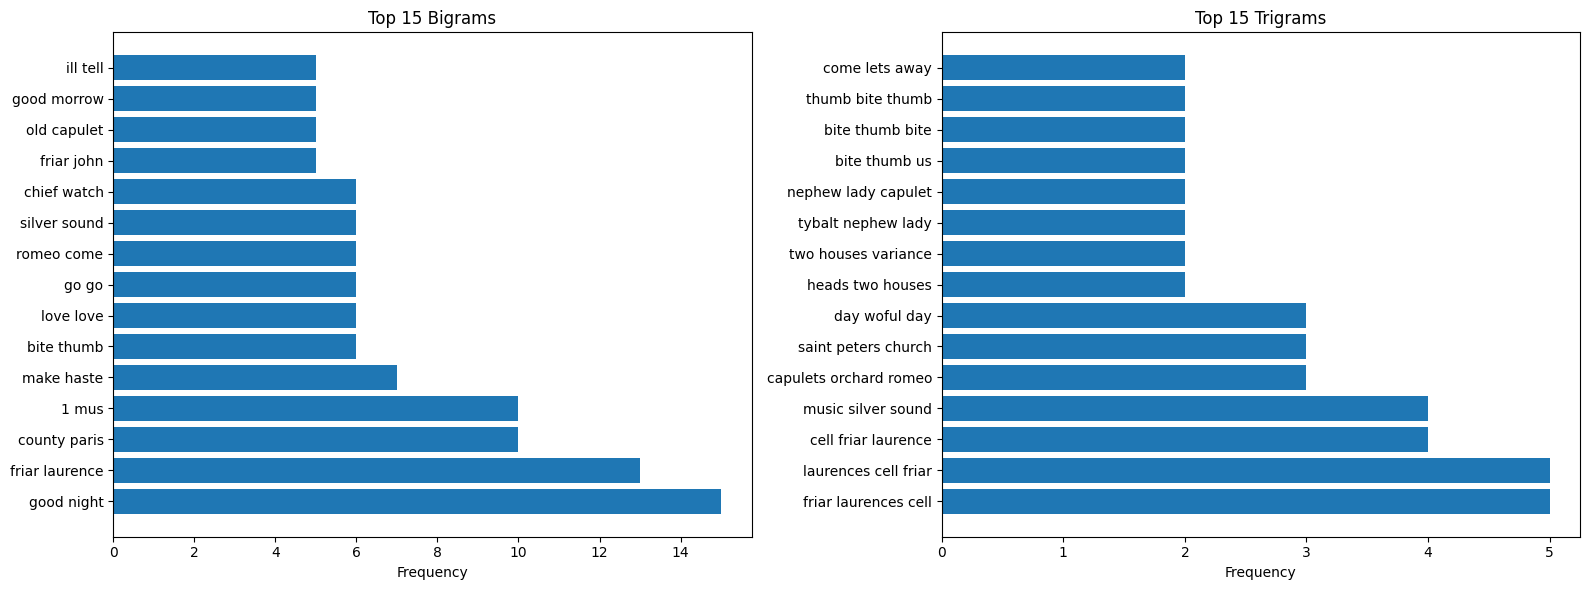

In [169]:
# Usage
bigram_freq = analyze_ngrams(text, n=2)
trigram_freq = analyze_ngrams(text, n=3)
visualize_ngrams(bigram_freq, trigram_freq)

## Concordance and Collocation

For more information please refer to [Concordance and Collocation](../concordance.ipynb)

### Concordance


In [ ]:
# Use token variable from above for word tokenization version of raw_text
# Create an NLTK Text object
con_text = nltk.Text(token)

nltk.text.Text

This code uses `.concordance` to output all occurrences of the word `love` in the text, showing the word in its immediate context (a few words before and after). This helps understand how `love` is used in different parts of the text — useful for analyzing themes, tone, or character relationships (especially in a play like Romeo and Juliet). The search is **case-sensitive**, so make sure `love` matches the casing in your token list. `love` can be changed to other words like `death`, `juliet`, or `romeo` to explore more. By default, the first 25 matches are printed along with 80 charactes on each side. This can be changed by sending `lines` and `width` attributes with your given word.

In [174]:
# Create a concordance for the given word
con_text.concordance('love')

Displaying 25 of 137 matches:
 fearful passage of their deathmarkd love and the continuance of their parents
which having makes them short ben in love rom out ben of love rom out of her f
hem short ben in love rom out ben of love rom out of her favour where i am in 
 rom out of her favour where i am in love ben alas that love so gentle in his 
our where i am in love ben alas that love so gentle in his view should be so t
ous and rough in proof rom alas that love whose view is muffled still should w
s much to do with hate but more with love why then o brawling love o loving ha
t more with love why then o brawling love o loving hate o anything of nothing 
ng sleep that is not what it is this love feel i that feel no love in this dos
 it is this love feel i that feel no love in this dost thou not laugh ben no c
ave it prest with more of thine this love that thou hast shown doth add more g
d more grief to too much of mine own love is a smoke raisd with the fume of si
n tell me in sadness w

`.concordance` can accept a bigram, trigram, or longer construction, they are supplied as individual strings within a Python list. (If you try to supply a string with a space in the middle, there will be no results.)

In [177]:
# Create a concordance for a sequence of words
con_text.concordance(['romeo', 'juliet'])

Displaying 1 of 1 matches:
hat word is father mother tybalt romeo juliet all slain all dead romeo is bani


### Collocation


This code imports the necessary tools from NLTK to find collocations — frequent or statistically significant combinations of words — using bigrams and trigrams.

In [178]:
from nltk.collocations import BigramCollocationFinder, TrigramCollocationFinder
from nltk.metrics import BigramAssocMeasures, TrigramAssocMeasures


This code initializes objects that provide statistical association measures for evaluating how strongly two (bigram) or three (trigram) words are associated with each other in a corpus.

In [179]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()

This code snippet identifies the top 10 bigram collocations in your tokenized text using **Pointwise Mutual Information (PMI)**, a statistical measure of association between two words. It first wraps your list of word tokens (`token`) in an `nltk.Text` object to enable advanced NLP methods like concordances and collocations. Next, it initializes a `BigramCollocationFinder`, which scans through the text to find all word pairs (bigrams) and filters out all bigrams that occur fewer than 3 times in your text. Then, it uses **PMI** to rank how strongly word pairs are associated and returns the top **10 highest-scoring bigrams**.

In [185]:
collocation_text = nltk.Text(token)
finder = BigramCollocationFinder.from_words(collocation_text)
finder.apply_freq_filter(3)
finder.nbest(bigram_measures.pmi, 10)

[('saint', 'peters'),
 ('princes', 'doom'),
 ('peters', 'church'),
 ('thousand', 'times'),
 ('hearts', 'ease'),
 ('laurences', 'cell'),
 ('1', 'mus'),
 ('silver', 'sound'),
 ('chief', 'watch'),
 ('capulets', 'orchard')]

This code is identifying the **top 25 trigram collocations** using **PMI (Pointwise Mutual Information)** after applying a frequency filter. First, it initializes a trigram finder using your list of tokens (`collocation_text`). Then, it looks for all 3-word combinations (`trigrams`). It removes trigrams that appear fewer than **3 times**, this helps eliminate statistically unreliable or noisy phrases. Finally, it returns the **25 trigrams with the highest PMI scores**. **PMI** emphasizes strong, non-random associations between words.

In [184]:
finder = TrigramCollocationFinder.from_words(collocation_text)
finder.apply_freq_filter(3)
#finder.apply_word_filter(lambda w: w in ('I', 'me')) Remove particular words with a lambda function
finder.nbest(trigram_measures.pmi, 25)

[('saint', 'peters', 'church'),
 ('scene', 'v', 'capulets'),
 ('scene', 'ii', 'capulets'),
 ('exeunt', 'scene', 'ii'),
 ('exeunt', 'scene', 'v'),
 ('laurences', 'cell', 'enter'),
 ('exeunt', 'scene', 'iv'),
 ('friar', 'laurences', 'cell'),
 ('exeunt', 'scene', 'iii'),
 ('whose', 'names', 'are'),
 ('capulets', 'orchard', 'enter'),
 ('plague', 'o', 'both'),
 ('bite', 'my', 'thumb'),
 ('her', 'silver', 'sound'),
 ('both', 'your', 'houses'),
 ('farewell', 'exeunt', 'scene'),
 ('the', 'princes', 'doom'),
 ('a', 'thousand', 'times'),
 ('capulets', 'house', 'enter'),
 ('enter', 'friar', 'laurence'),
 ('then', 'dreams', 'he'),
 ('son', 'and', 'heir'),
 ('cell', 'enter', 'friar'),
 ('orchard', 'enter', 'romeo'),
 ('enter', 'old', 'capulet')]